# Problem set 2 problem 1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the data set
data = np.loadtxt('HW2_PCA_Data.csv', delimiter=',')

## Part a

In [3]:
# mean centering the columns of data
for i in range(1000):
    C = np.mean(data[:,i])
    data[:,i] = np.subtract(data[:,i], C)

In [4]:
# evaluating the covariance matrix
data_transpose = np.transpose(data)
covariance = np.dot(data_transpose, data)

In [5]:
# Function for implementing Gram-Schmidt orthogonalization
def orthonorm(M):
    m = np.size(M, 0)
    n = np.size(M, 1)
    norm = np.linalg.norm(M[:,0])
    M[:, 0] = M[:, 0]/norm
    
    for i in range(1, n):
        for j in range(i):
            M[:, i] -= np.dot(M[:, i], M[:, j])*M[:, j]
        norm = np.linalg.norm(M[:,i])
        M[:, i] = M[:, i]/norm
        
    return M

# Function for implementing orthogonal iteration
def or_iteration(M, N, l, e):
    n = np.size(M, 0)
    P = np.random.rand(n, l) # random initial guess for the eigenvetor matrix
    Q = orthonorm(P) # orthonormal initial guess
    for i in range(N):
        Q_prev = Q
        Q = np.dot(M, Q)
        Q = orthonorm(Q)
        T = np.dot(np.transpose(Q_prev), Q)
        t = np.sqrt(l - np.trace(T))
        
        if t < e:
            return Q
    if i == N - 1:
        print("Maximum number of iterations is reached")
        return
        

In [6]:
# Finding the largest 3 eigenvectors of the convariance matrix
P = or_iteration(covariance, 1000, 3, 0.0001)

In [7]:
# Finding the corresponding principle components
pc_1 = np.dot(data, P[:, 0])
pc_2 = np.dot(data, P[:, 1])
pc_3 = np.dot(data, P[:, 2])

### Part b

Text(0, 0.5, 'Principle component 2')

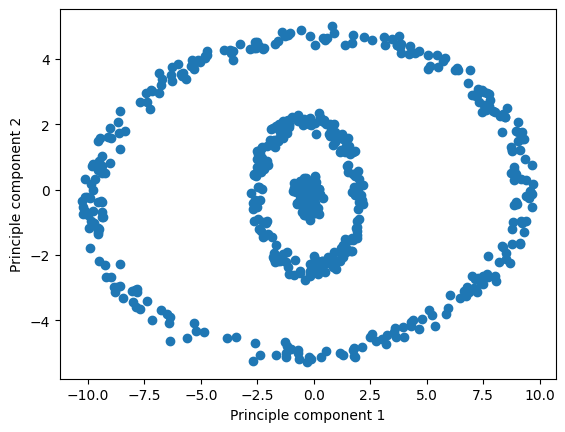

In [8]:
# Plotting the data points in the subspace spanned by PC-1 and PC-2
plt.scatter(pc_1, pc_2)
plt.xlabel("Principle component 1")
plt.ylabel("Principle component 2")

Text(0, 0.5, 'Principle component 3')

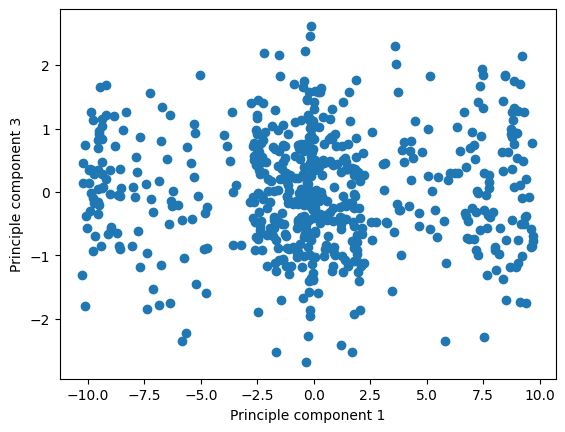

In [9]:
# Plotting the data points in the subspace spanned by PC-1 and PC-3
plt.scatter(pc_1, pc_3)
plt.xlabel("Principle component 1")
plt.ylabel("Principle component 3")

Text(0, 0.5, 'Principle component 3')

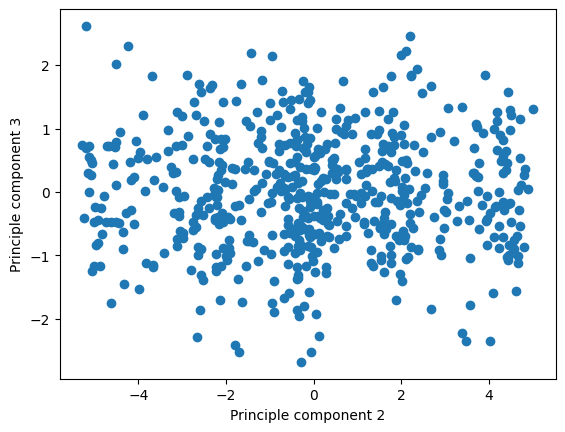

In [10]:
# Plotting the data points in the subspace spanned by PC-2 and PC-3
plt.scatter(pc_2, pc_3)
plt.xlabel("Principle component 2")
plt.ylabel("Principle component 3")

### Part c

In [11]:
# Computing variance explained
transformed_P = np.dot(covariance, P)
right_singular_values = np.dot(np.transpose(P), transformed_P)

variance_explained = np.trace(right_singular_values)/np.trace(covariance)
print(variance_explained) # The fraction of the total variance captured is small owing to the curse of dimensionality

0.16960718236540603


### Part d

In [12]:
# Implementing kernel PCA on the projected data points on the PC-1 and PC-2 subspace.
projected_data = np.vstack((pc_1, pc_2))
X = np.transpose(projected_data)
print(X.shape)

(600, 2)


In [14]:
# Evaluating the radial basis kernel
kernel = np.empty([600, 600])

for i in range(600):
    for j in range(600):
        distance = np.linalg.norm(X[i, :] - X[j, :])
        kernel[i, j] = np.exp(-0.25*distance**2)

print(kernel.shape)

(600, 600)


In [15]:
# Determining the first two left singular vectors of the kernel matrix
W = or_iteration(kernel, 1000, 2, 0.0001)
print(W.shape)

(600, 2)


In [17]:
# Computing the principle components corresponding to the new PCs.
transformed_kernel = np.dot(kernel, W)
left_eigen_values = np.dot(np.transpose(W), transformed_kernel)

kpc_1 = np.dot(kernel, W[:, 0])/left_eigen_values[0, 0]**0.5
kpc_2 = np.dot(kernel, W[:, 1])/left_eigen_values[1, 1]**0.5
print(left_eigen_values)

[[ 1.16230765e+02 -2.65977709e-11]
 [-2.66023453e-11  4.77075875e+01]]


Text(0, 0.5, 'Kernel Principle component 2')

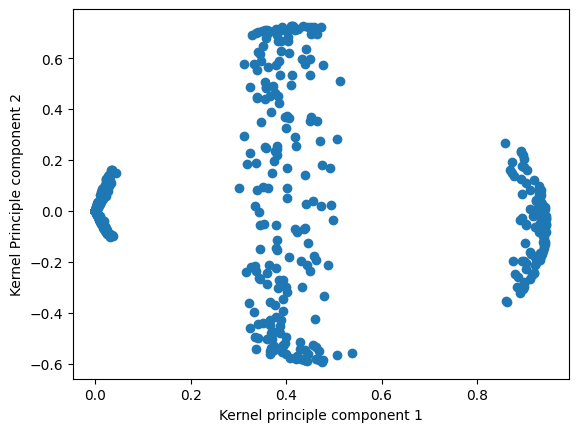

In [50]:
# Data points in the newly projected space
plt.scatter(kpc_1, kpc_2)
plt.xlabel("Kernel principle component 1")
plt.ylabel("Kernel Principle component 2")

In [116]:
# Algorithm implementing k-means clustering
def k_means(M, k, N):
    m, n = M.shape
    shuffled = np.copy(M)
    np.random.shuffle(shuffled)
    centriods = shuffled[0:k, :] # randomly choosing k points from the data set as initial guess
    cluster_type = np.arange(k, dtype=int)
    cluster_labels = np.random.choice(cluster_type, size=m) # random initial assignment to a cluster
    iteration = 0 
    
    # k-means iteration 
    while (iteration <= N):
        
        # For each data point find the closest center and reassign the corresponding label. 
        for i in range(m):
            closest_distance = np.linalg.norm(M[i, :] - centriods[0, :]) # distance from the first centriod
            closest_cluster = 0 # initializing the closest centriod to centriod 1

            for j in range(1, k):
                prev_closest_distance = closest_distance
                closest_distance = np.linalg.norm(M[i, :] - centriods[j, :])

                if closest_distance < prev_closest_distance:
                    closest_cluster = j

            cluster_labels[i] = closest_cluster

        # Compute the coordinates of new centriods
        previous_centriods = np.copy(centriods)
        
        
        for i in range(k):
            centriods[i, :] = np.zeros([1, n])
            count = 1
            for j in range(m):
                if cluster_labels[j] == i:
                    centriods[i, :] = np.add(centriods[i, :], M[j, :])
                    count = count + 1
            
            centriods[i, :] = centriods[i, :]/count
        
        print(iteration)
        iteration += 1 
        # Checking for convergence
        if np.allclose(centriods, previous_centriods, 1e-07, 1e-08):
            break
        
    
    if iteration == N:
        return 'Maximum number of iterations has been reached.'
    
    return cluster_labels
            
            

In [122]:
embedded_data = np.transpose(np.vstack((kpc_1, kpc_2)))
print(embedded_data.shape)

(600, 2)


In [123]:
labels = k_means(embedded_data, 3, 100)

0
1
2
3
4
5


In [124]:
print(np.count_nonzero(labels == 0))

96


In [125]:
labeled_data = np.empty([600, 3])
labeled_data[:, 0] = pc_1
labeled_data[:, 1] = pc_2
labeled_data[:, 2] = labels

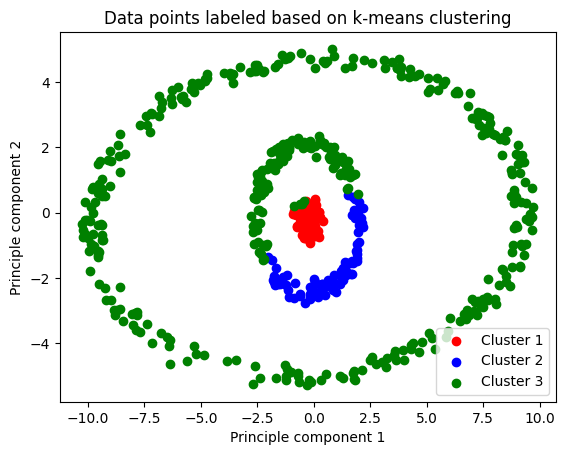

In [126]:
cluster_1 = (labeled_data[:, 2] == 0)
cluster_2 = (labeled_data[:, 2] == 1)
cluster_3 = (labeled_data[:, 2] == 2)

plt.scatter(labeled_data[:, 0][cluster_1], labeled_data[:, 1][cluster_1], color = 'r')
plt.scatter(labeled_data[:, 0][cluster_2], labeled_data[:, 1][cluster_2], color = 'b')
plt.scatter(labeled_data[:, 0][cluster_3], labeled_data[:, 1][cluster_3], color = 'g')

plt.xlabel("Principle component 1")
plt.ylabel("Principle component 2")
plt.legend(["Cluster 1", "Cluster 2", "Cluster 3"], loc="lower right")
plt.title("Data points labeled based on k-means clustering")

plt.show()